In [ ]:
#import necessary libraries
import pandas as pd
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<p style="font-size:19px">
    AIM : utilizing Sales Data with aims of prediciting how <u>one product</u> will perform on a specified date.<br>
    <br>A linear regression model can assist in making optimized and effective decisions that best benefit retail.
    <br><ul style="font-size:19px">
    <li>Supply and Demand: If knowing the price of a product will increase in the future, you can increase the current price to take advavantage of higher profit margins. Similarly, if predicted price will be lower in the future, prices can be currently lowered nowto avoid markdowns and overstocking. </li></ul></p>

### read Sep 2022 - May 2023 data (9 months-worth)

### A linear regression i created that utilized 22GB worth of Data

In [3]:
sep_22_df = pd.read_csv("../data/cleaned_SALES_2022_SEP.csv", index_col=0, low_memory= False)

In [4]:
oct_22_df = pd.read_csv("../data/cleaned_SALES_2022_OCT.csv", index_col=0, low_memory= False)

In [5]:
nov_22_df = pd.read_csv("../data/cleaned_SALES_2022_NOV.csv", index_col=0, low_memory= False)

In [6]:
dec_22_df = pd.read_csv("../data/cleaned_SALES_2022_DEC.csv", index_col=0, low_memory= False)

In [7]:
jan_df = pd.read_csv("../data/cleaned_SALES_2023_JAN.csv", index_col=0, low_memory= False)

In [8]:
feb_df = pd.read_csv("../data/cleaned_SALES_2023_FEB.csv", index_col=0, low_memory= False)

In [9]:
march_df = pd.read_csv("../data/cleaned_SALES_2023_MARCH.csv", index_col=0, low_memory= False)

In [10]:
april_df = pd.read_csv("../data/cleaned_SALES_2023_April.csv", index_col=0, low_memory= False)

In [ ]:
may_df = pd.read_csv("../data/CLEANED_SALES_2023_MAY.csv", index_col=0, low_memory= False)

#### Merge the datasets

In [ ]:
sep_april_data =pd.concat([jan_df,feb_df,march_df, april_df,nov_22_df,dec_22_df, sep_22_df, oct_22_df])

### Cleaning The Dataset

#### remove negative sales

In [12]:
sep_april_data = sep_april_data[sep_april_data['BST_TOTAL_RETAIL'] >= 0]

In [13]:
sep_april_data.shape

(176283913, 18)

#### filter for Mango  sales

In [16]:
mango_data = (sep_april_data['BST_ITM_CD'] == '4202Mango')

In [17]:
mango_data = sep_april_data[mango_data]

In [24]:
print('highest amount : ',mango_data.BST_TOTAL_RETAIL.max())
print('lowet amount : ',mango_data.BST_TOTAL_RETAIL.min())
print('average amount : ',mango_data.BST_TOTAL_RETAIL.mean())

highest amount :  19578.0
lowet amount :  1.5
average amount :  21.65271729991608


#### Filter for columns that will be used in the Linear Regression Model

In [17]:
mango_data = mango_data[['BST_TXN_DT_TIME','BST_QTY','BST_TYPE_OF_SALE', 'BST_TOTAL_RETAIL']]

In [18]:
mango_data = mango_data.copy()

### Data Preperation for the Model

##### coverting type of sale column to binary 0s and 1s , 0 being normal and 1 being promotions

In [19]:
mango_data['BST_TYPE_OF_SALE']= mango_data['BST_TYPE_OF_SALE'].apply(lambda x:1 if x =='NORMAL' else 0)

#### Convert the BST_TXN_DT_TIME from DATETIME to Integer Number as input in the model

In [20]:
mango_data.loc[:,'BST_TXN_DT_TIME'] = pd.to_datetime(mango_data['BST_TXN_DT_TIME'])

In [21]:
mango_data['BST_TXN_DT_TIME'] = mango_data['BST_TXN_DT_TIME'].apply(lambda x: x.timestamp())

#### Drop the BST_TXT_TYPE AS INDEX 

In [22]:
mango_data = mango_data.reset_index(drop=True)

#### define features and target variables of interes

In [23]:
X = mango_data.iloc[:,0:3].values
y= mango_data.iloc[:,-1:].values

####  Split the data into training and testing

In [24]:
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=42)

#### Fit and train the LinearRegression Model

In [25]:
#fit the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

#### Performing Predictions

In [27]:
pred = [[1704085049, 200, 0]] 

In [28]:
model.predict(pred)

array([[1463.34698888]])

<p style='font-size:16px'> A relationship between actual and predicted values, in this graph the scatter reprents the predicted values and the line graph is actual value. The distance between Predicted Vs. Actual Values is measure the accuracy of the model in visualization</p>

<p style='font-size:16px'> Explanation ; A positive Correlation ( Uptrend ) is depicted indicating a strong relationship between the predicted and actual
values.</p><br>

<p style='font-size:16px'> 
    1. The points clustering from 0- 7000 indicate the model can accurately predict values in that range. The conclution is the model performs well in predicting the target variable in that range. <br><br>
2. The the cluster slighly spread as values increase, this indicates the model slighly becomes less accurate for higher values of the target varibles. </p> 

#### Used a scatter graph to chect the accuracy of the model using actual vs predicted values

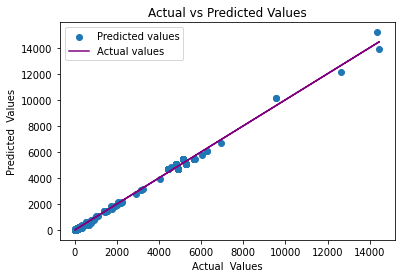

In [49]:
plt.scatter(y_test, y_pred, label ="Predicted values")
plt.plot(y_test,y_test, label = "Actual values", color ='purple')
plt.xlabel('Actual  Values')
plt.ylabel('Predicted  Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

##### Evaulate the model on the testing data and checking acccuracy using r2

In [40]:
from sklearn.metrics import r2_score
r2 =r2_score(y_test, y_pred)
print('r2 Score:',r2)

r2 Score: 0.9974837757137128


In [32]:
import seaborn as sns 

<Axes: title={'center': 'Actual vs. Predicted'}, xlabel='Actual G*', ylabel='Predicted G*'>

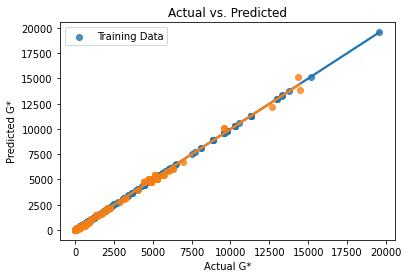

In [39]:
sns.regplot(y_train,y_train, label="Training Data")

plt.xlabel('Actual G*')
plt.ylabel('Predicted G*')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")

sns.regplot(y_test,y_pred, label="Testing Data")

#### The Mean Squared Error measures how close the predicted values are to the actual values.

In [41]:
MSE = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ', MSE)

Mean Squared Error:  81.5102782979144


In [ ]:
# Create the scatter plot
plt.scatter(actual, predicted)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--')

# Show the plot
plt.show()